# UK Domestic Gas Demand - Exploratory Data Analysis

This notebook loads the provided training and test datasets and performs an initial exploratory analysis to understand data distributions, relationships, and potential modeling features.

In [32]:
# Imports & settings
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from typing import List
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', 120)
pd.set_option('display.width', 160)
sns.set_theme(style="whitegrid", context="notebook")

DATA_DIR = Path('.')
TRAIN_PATH = DATA_DIR / 'train.csv'
TEST_PATH = DATA_DIR / 'test.csv'

# Load data

In [33]:
# Load data
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
print(f"train shape: {train.shape} | test shape: {test.shape}")
print("Train:")
display(train.head())
print("Test:")
display(test.head())

train shape: (3287, 68) | test shape: (730, 67)
Train:


,id,demand,date,temp_1,temp_night_1,wind_1,wind_night_1,ssrd_ratio_1,temp_2,temp_night_2,wind_2,wind_night_2,ssrd_ratio_2,temp_3,temp_night_3,wind_3,wind_night_3,ssrd_ratio_3,temp_4,temp_night_4,wind_4,wind_night_4,ssrd_ratio_4,temp_5,temp_night_5,wind_5,wind_night_5,ssrd_ratio_5,temp_6,temp_night_6,wind_6,wind_night_6,ssrd_ratio_6,temp_7,temp_night_7,wind_7,wind_night_7,ssrd_ratio_7,temp_8,temp_night_8,wind_8,wind_night_8,ssrd_ratio_8,temp_9,temp_night_9,wind_9,wind_night_9,ssrd_ratio_9,temp_10,temp_night_10,wind_10,wind_night_10,ssrd_ratio_10,temp_11,temp_night_11,wind_11,wind_night_11,ssrd_ratio_11,temp_12,temp_night_12,wind_12,wind_night_12,ssrd_ratio_12,temp_13,temp_night_13,wind_13,wind_night_13,ssrd_ratio_13
0,2,248.551330,2009-01-01,0.493500,-0.024375,2.337942,0.960386,0.834858,-0.324375,-0.064167,2.000167,0.954810,0.809615,0.339875,0.437500,2.005076,0.941748,0.831984,-0.056792,0.108583,0.947275,0.497007,0.941224,0.493500,-0.024375,2.337942,0.960386,0.834858,-2.110792,-0.927542,1.502491,0.569329,1.224273,0.783083,0.428083,1.511294,0.729777,0.968783,1.358708,0.340708,2.560146,0.905621,0.785167,1.043208,0.308625,3.162452,1.130354,0.803705,-0.048500,-0.003208,3.751084,1.327008,0.662506,-1.295583,-0.482708,1.674705,0.727538,1.000729,-2.363625,-0.754208,1.748286,0.438337,1.240712,-2.409958,-0.800167,2.200373,0.762233,0.915315
1,3,242.671902,2009-01-02,0.707125,-0.772042,3.241219,0.933666,1.585796,1.011167,-0.496917,2.662331,0.713957,1.281451,1.809042,0.359292,2.044462,0.590232,1.334675,1.083167,-0.016458,1.663482,0.566192,1.340301,0.707125,-0.772042,3.241219,0.933666,1.585796,0.014583,-0.475375,2.210134,0.643621,1.628039,0.148833,-0.211792,1.612937,0.470433,1.357182,1.385417,-0.151333,4.001515,1.542935,1.248984,0.903125,-0.266000,4.029605,1.524233,1.380781,0.264500,-0.513333,3.726959,1.439612,1.559504,0.607375,-0.541083,2.773653,0.748476,1.584069,-0.279708,-0.677500,1.826779,0.590232,1.514933,-0.316625,-0.612000,3.044197,0.997103,1.165282
2,4,251.157507,2009-01-03,-1.296292,-1.071583,2.420432,1.173104,1.424222,-0.819917,-0.821917,2.765365,1.455191,1.511327,-0.061958,-0.273417,2.697702,1.156707,1.608006,-0.336750,-0.199375,3.712683,1.415630,1.709196,-1.296292,-1.071583,2.420432,1.173104,1.424222,-0.711500,-0.405583,2.848228,1.174666,1.835732,-0.529500,-0.102542,2.074529,0.759501,1.659446,-1.883500,-1.427708,2.540721,0.872266,1.648440,-2.310917,-1.803083,2.516450,0.702709,1.664395,-3.221042,-1.745042,2.365616,0.581417,1.624251,-1.819708,-1.142625,2.313943,1.159706,1.348411,-1.832542,-1.051208,1.238009,0.766633,1.572659,-3.518542,-1.978167,1.580882,0.578175,1.793391
3,5,260.073426,2009-01-04,-0.899583,-0.257417,3.756638,1.464167,1.067949,-0.197667,0.194583,3.864623,1.648679,0.922383,0.792208,0.524583,3.590750,1.614120,1.184490,0.752875,0.278542,3.469464,1.237025,1.546201,-0.899583,-0.257417,3.756638,1.464167,1.067949,-0.319083,-0.018250,3.173690,1.477583,1.405182,1.575958,0.424917,2.294467,1.022269,1.327422,-1.038042,-0.335083,3.084277,1.198464,1.191203,-1.138000,-0.409750,2.588103,1.037379,1.067696,-0.420667,-0.164708,1.700113,0.714007,0.916153,-0.760000,-0.126083,3.210321,1.367881,0.637383,-0.315917,-0.044708,2.237830,0.961864,0.613913,-1.496042,-0.720583,2.173770,0.862646,0.792718
4,6,277.125461,2009-01-05,-0.905250,-1.125292,4.416067,1.288584,1.503319,-0.249708,-0.721083,3.477253,0.953097,1.554026,0.035875,-0.564708,2.398792,0.650867,1.328816,-1.491333,-1.445708,2.014950,0.703190,1.386819,-0.905250,-1.125292,4.416067,1.288584,1.503319,-1.766083,-1.402167,2.547678,0.683394,1.628763,-1.931625,-1.640833,1.525632,0.696030,1.858612,-0.277250,-0.790042,5.454941,1.726265,1.580837,-0.690417,-1.071292,5.264332,1.672140,1.497782,-1.129875,-1.496292,4.383735,1.294575,1.047078,-1.167250,-1.239208,3.436457,0.902235,1.748205,-1.375833,-1.417083,2.134971,0.617133,1.443376,-1.569000,-1.572250,3.726705,1.006098,1.227480


Test:


,id,date,temp_1,temp_night_1,wind_1,wind_night_1,ssrd_ratio_1,temp_2,temp_night_2,wind_2,wind_night_2,ssrd_ratio_2,temp_3,temp_night_3,wind_3,wind_night_3,ssrd_ratio_3,temp_4,temp_night_4,wind_4,wind_night_4,ssrd_ratio_4,temp_5,temp_night_5,wind_5,wind_night_5,ssrd_ratio_5,temp_6,temp_night_6,wind_6,wind_night_6,ssrd_ratio_6,temp_7,temp_night_7,wind_7,wind_night_7,ssrd_ratio_7,temp_8,temp_night_8,wind_8,wind_night_8,ssrd_ratio_8,temp_9,temp_night_9,wind_9,wind_night_9,ssrd_ratio_9,temp_10,temp_night_10,wind_10,wind_night_10,ssrd_ratio_10,temp_11,temp_night_11,wind_11,wind_night_11,ssrd_ratio_11,temp_12,temp_night_12,wind_12,wind_night_12,ssrd_ratio_12,temp_13,temp_night_13,wind_13,wind_night_13,ssrd_ratio_13
0,3289,2018-01-01,5.585208,1.993833,6.186903,2.687792,0.986323,5.480292,1.860458,6.289224,2.477491,1.532661,4.906208,1.638667,4.867111,1.985315,1.118326,4.095500,1.293458,4.554193,1.994757,1.365291,5.585208,1.993833,6.186903,2.687792,0.986323,4.521542,1.597250,5.806130,2.250465,1.137394,3.894458,1.314958,3.430037,1.263826,0.838331,6.231917,2.117500,6.067020,2.474217,0.406965,6.371542,2.136208,5.632045,2.078540,0.515849,6.765625,2.208583,5.916266,1.591488,1.088230,4.971667,1.653083,6.323299,2.237393,1.579167,5.414625,1.751167,5.319593,1.743017,1.519060,5.269542,1.620917,5.583635,1.712075,1.480541
1,3290,2018-01-02,7.299708,3.047417,7.304455,3.489781,0.325592,6.497458,2.699792,7.298662,3.440260,0.259870,5.401500,2.348500,6.526492,3.395982,0.272408,4.219500,1.797417,6.057252,3.222546,0.274445,7.299708,3.047417,7.304455,3.489781,0.325592,4.931500,2.001542,7.212684,3.740416,0.311366,3.407625,0.911917,3.589305,1.679293,0.491665,8.609833,3.362542,7.755533,3.705482,0.321120,8.854167,3.316375,7.376900,3.376542,0.325761,9.476417,3.250083,7.771640,3.390154,0.381399,6.032792,2.387167,6.641903,3.069284,0.302090,6.716708,2.402708,6.134415,2.722164,0.469433,7.306375,2.515708,6.971262,2.972217,0.415229
2,3291,2018-01-03,7.480708,2.393500,9.116166,2.729530,1.292505,7.725583,2.637750,9.317749,2.947378,1.070616,7.406292,2.598625,8.629884,2.830643,1.216635,5.708250,2.060042,6.947765,2.306540,1.013681,7.480708,2.393500,9.116166,2.729530,1.292505,6.109458,2.211833,9.308276,3.061439,0.861829,4.393167,1.275417,3.362221,0.784990,0.889051,8.114000,2.780917,8.338807,2.477711,1.666629,8.163708,2.813542,7.899299,2.216643,1.677444,8.489833,2.909708,7.657378,2.001864,1.437224,7.220667,2.523792,8.508729,2.641167,1.067815,7.483250,2.572125,7.073263,2.146690,1.225938,6.883917,2.259542,6.909641,1.967227,1.553210
3,3292,2018-01-04,7.068500,2.045583,6.344000,1.467153,0.570070,5.922167,1.509625,6.090639,1.419745,0.498464,5.276250,1.728500,4.647724,1.389834,0.264780,3.712167,1.201875,3.201879,1.311011,0.207916,7.068500,2.045583,6.344000,1.467153,0.570070,4.344875,1.506083,5.107023,1.517544,0.362627,3.389250,1.029292,1.626000,0.431177,0.426661,8.642250,2.703625,6.844123,1.777975,0.705095,8.621333,2.680167,6.732553,1.635350,0.829680,8.752792,2.782625,6.819200,1.981451,0.917352,5.182542,1.167625,5.400925,1.025231,0.645751,5.605083,1.394917,4.918405,0.857545,0.888301,6.452083,1.735833,5.871079,1.027200,1.015007
4,3293,2018-01-05,4.458708,0.857667,4.177804,0.719279,1.527976,3.002167,0.377917,2.531515,0.768670,0.685531,3.080208,1.208292,2.260544,1.132349,0.811807,2.819458,1.193583,3.226995,1.671819,0.852505,4.458708,0.857667,4.177804,0.719279,1.527976,2.570667,0.817042,2.348939,1.335346,0.983566,2.734583,1.006917,3.162567,1.450874,0.727963,5.688542,1.539375,4.286628,0.913755,1.339406,5.104417,1.222917,3.877448,1.082896,1.517945,3.857583,0.697167,3.491968,1.140985,1.500906,1.999333,0.061792,2.270854,0.753529,0.501262,2.003125,0.390792,1.896462,0.657776,0.762359,2.236458,0.072667,3.182478,0.957821,1.048007


In [34]:
# Basic schema & missingness summary
def summarize_df(df: pd.DataFrame, name: str):
    print(f"\n==== {name} ====")
    display(pd.DataFrame({'column': df.columns, 'dtype': df.dtypes.astype(str)}).reset_index(drop=True))
    miss = df.isna().mean().sort_values(ascending=False)
    miss_nonzero = miss[miss > 0]
    if not miss_nonzero.empty:
        display(pd.DataFrame({'missing_rate': miss_nonzero}).style.background_gradient(cmap='Reds'))
    display(df.describe(include='all'))

summarize_df(train, 'TRAIN')
summarize_df(test, 'TEST')


==== TRAIN ====


,column,dtype
0,id,int64
1,demand,float64
2,date,object
3,temp_1,float64
4,temp_night_1,float64
...,...,...
63,temp_13,float64
64,temp_night_13,float64
65,wind_13,float64
66,wind_night_13,float64


,id,demand,date,temp_1,temp_night_1,wind_1,wind_night_1,ssrd_ratio_1,temp_2,temp_night_2,wind_2,wind_night_2,ssrd_ratio_2,temp_3,temp_night_3,wind_3,wind_night_3,ssrd_ratio_3,temp_4,temp_night_4,wind_4,wind_night_4,ssrd_ratio_4,temp_5,temp_night_5,wind_5,wind_night_5,ssrd_ratio_5,temp_6,temp_night_6,wind_6,wind_night_6,ssrd_ratio_6,temp_7,temp_night_7,wind_7,wind_night_7,ssrd_ratio_7,temp_8,temp_night_8,wind_8,wind_night_8,ssrd_ratio_8,temp_9,temp_night_9,wind_9,wind_night_9,ssrd_ratio_9,temp_10,temp_night_10,wind_10,wind_night_10,ssrd_ratio_10,temp_11,temp_night_11,wind_11,wind_night_11,ssrd_ratio_11,temp_12,temp_night_12,wind_12,wind_night_12,ssrd_ratio_12,temp_13,temp_night_13,wind_13,wind_night_13,ssrd_ratio_13
count,3287.000000,3287.000000,3287,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000
unique,NaN,NaN,3287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1645.000000,113.765622,NaN,10.552790,3.263018,4.399474,1.521017,0.996367,10.225176,3.147048,4.463689,1.530830,1.003077,9.748596,2.975316,4.210893,1.402853,1.001493,8.684097,2.670370,4.118419,1.404996,1.003028,10.552790,3.263018,4.399474,1.521017,0.996367,8.439088,2.607268,4.273000,1.436508,1.003399,8.829662,2.736485,3.609441,1.211297,0.998987,10.723562,3.381856,4.421400,1.530087,0.996852,10.715280,3.335087,4.203065,1.451677,0.996660,10.581662,3.302538,4.158442,1.381391,0.999404,9.525441,2.951588,4.294892,1.474722,1.001644,9.645263,3.029627,3.709561,1.246636,0.999305,9.476620,2.911726,3.845047,1.270723,0.997776
std,949.019494,67.528188,NaN,5.506289,1.888869,1.742749,0.659521,0.366350,5.383295,1.845113,1.830197,0.694061,0.369087,5.195691,1.785755,1.774542,0.680998,0.354246,4.953115,1.718288,1.841064,0.728700,0.365652,5.506289,1.888869,1.742749,0.659521,0.366350,4.952603,1.731233,1.924066,0.768509,0.387853,4.839592,1.727828,1.706912,0.662454,0.414297,5.227896,1.834692,1.792247,0.695634,0.356083,5.239863,1.830365,1.654737,0.638288,0.366537,4.954978,1.776239,1.647133,0.642175,0.375814,5.133999,1.782557,1.666374,0.634477,0.382284,4.962714,1.748445,1.574172,0.612475,0.368270,5.055317,1.789236,1.624195,0.627326,0.383811
min,2.000000,26.559968,NaN,-5.390417,-3.162167,0.977937,0.281703,0.090560,-9.285500,-3.915000,0.910491,0.321906,0.083126,-8.145167,-3.982292,0.846091,0.278860,0.097519,-7.116917,-3.144083,0.620032,0.217249,0.124972,-5.390417,-3.162167,0.977937,0.281703,0.090560,-8.697542,-3.864625,0.653934,0.160867,0.080162,-10.907292,-4.563375,0.520752,0.154146,0.079625,-4.311333,-2.476792,0.789350


==== TEST ====


,column,dtype
0,id,int64
1,date,object
2,temp_1,float64
3,temp_night_1,float64
4,wind_1,float64
...,...,...
62,temp_13,float64
63,temp_night_13,float64
64,wind_13,float64
65,wind_night_13,float64


,id,date,temp_1,temp_night_1,wind_1,wind_night_1,ssrd_ratio_1,temp_2,temp_night_2,wind_2,wind_night_2,ssrd_ratio_2,temp_3,temp_night_3,wind_3,wind_night_3,ssrd_ratio_3,temp_4,temp_night_4,wind_4,wind_night_4,ssrd_ratio_4,temp_5,temp_night_5,wind_5,wind_night_5,ssrd_ratio_5,temp_6,temp_night_6,wind_6,wind_night_6,ssrd_ratio_6,temp_7,temp_night_7,wind_7,wind_night_7,ssrd_ratio_7,temp_8,temp_night_8,wind_8,wind_night_8,ssrd_ratio_8,temp_9,temp_night_9,wind_9,wind_night_9,ssrd_ratio_9,temp_10,temp_night_10,wind_10,wind_night_10,ssrd_ratio_10,temp_11,temp_night_11,wind_11,wind_night_11,ssrd_ratio_11,temp_12,temp_night_12,wind_12,wind_night_12,ssrd_ratio_12,temp_13,temp_night_13,wind_13,wind_night_13,ssrd_ratio_13
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3653.500000,NaN,11.035132,3.382035,4.285500,1.458931,1.022099,10.598226,3.232952,4.369901,1.489019,1.010032,10.057959,3.044555,4.120985,1.371058,1.002499,8.945840,2.731302,4.042018,1.381445,1.011466,11.035132,3.382035,4.285500,1.458931,1.022099,8.815759,2.692172,4.165214,1.390313,1.008349,9.011264,2.780182,3.569427,1.191820,1.016689,11.185371,3.506370,4.339158,1.489840,1.032807,11.208514,3.476907,4.120584,1.413588,1.028556,11.068812,3.428209,4.150493,1.383955,1.012958,9.932133,3.050202,4.223851,1.444576,1.000671,9.995977,3.106880,3.636327,1.225032,0.990897,9.867654,3.015322,3.800835,1.264531,1.000219
std,210.877136,NaN,5.744946,1.891804,1.716375,0.608085,0.391933,5.571371,1.840723,1.745365,0.640712,0.388374,5.387843,1.789313,1.668718,0.618589,0.369395,5.169971,1.744451,1.738643,0.670308,0.371336,5.744946,1.891804,1.716375,0.608085,0.391933,5.161062,1.738317,1.789417,0.695968,0.407305,5.020011,1.744937,1.615420,0.596454,0.427567,5.392287,1.817968,1.811928,0.650446,0.368977,5.418189,1.818802,1.708596,0.611806,0.377407,5.157389,1.757651,1.721017,0.668319,0.385906,5.330640,1.779188,1.628226,0.607914,0.401989,5.100682,1.733761,1.500396,0.573221,0.393403,5.199281,1.766159,1.608874,0.612548,0.396149
min,3289.000000,NaN,-4.623458,-2.070042,0.883796,0.390540,0.122877,-4.604583,-2.064500,1.232145,0.423639,0.082235,-3.651625,-1.481000,0.985582,0.303422,0.130109,-4.736250,-1.771333,0.770134,0.243637,0.142131,-4.623458,-2.070042,0.883796,0.390540,0.122877,-6.013500,-2.546875,0.785351,0.150741,0.131092,-3.861500,-1.783667,0.542431,0.156165,0.115114,-4.062750,-1.867000,1.203943,0.443035,0.177101,-3.904000,-2.012375,0.814458,0.389698,0.125833,-3.851458,-2.053083,0.839351,0.362874,0.115394,-4.830583,-2.1

# Distribution of data

Target column: demand


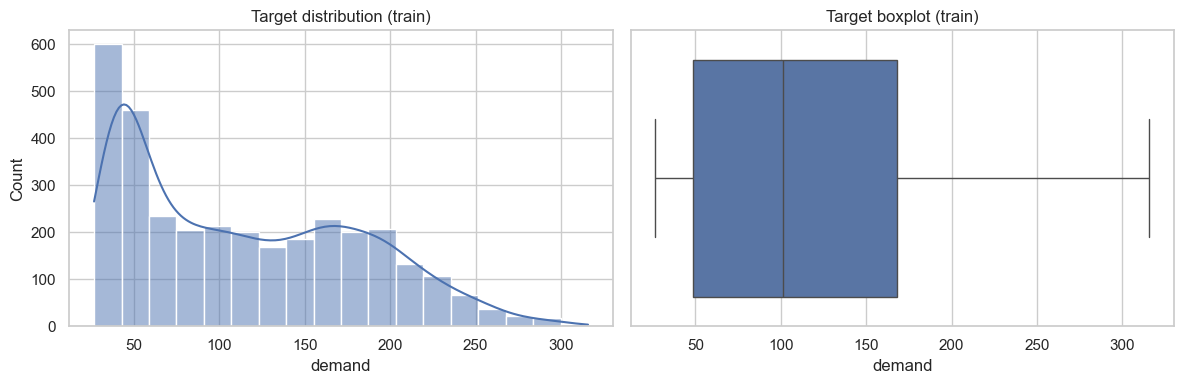

count    3287.000000
mean      113.765622
std        67.528188
min        26.559968
1%         31.368488
5%         34.880552
25%        48.719612
50%       101.192713
75%       168.343255
95%       232.010138
99%       271.012650
max       315.834588
Name: demand, dtype: float64

In [35]:
# Target distribution and basic stats (if present)
TARGET = 'demand'
print('Target column:', TARGET)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(train[TARGET].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Target distribution (train)')
sns.boxplot(x=train[TARGET], ax=axes[1])
axes[1].set_title('Target boxplot (train)')
plt.tight_layout()
plt.show()
    
display(train[TARGET].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]))


Numeric features (excluding target and id): ['temp_1', 'temp_night_1', 'wind_1', 'wind_night_1', 'ssrd_ratio_1', 'temp_2', 'temp_night_2', 'wind_2', 'wind_night_2', 'ssrd_ratio_2', 'temp_3', 'temp_night_3', 'wind_3', 'wind_night_3', 'ssrd_ratio_3', 'temp_4', 'temp_night_4', 'wind_4', 'wind_night_4', 'ssrd_ratio_4', 'temp_5', 'temp_night_5', 'wind_5', 'wind_night_5', 'ssrd_ratio_5', 'temp_6', 'temp_night_6', 'wind_6', 'wind_night_6', 'ssrd_ratio_6', 'temp_7', 'temp_night_7', 'wind_7', 'wind_night_7', 'ssrd_ratio_7', 'temp_8', 'temp_night_8', 'wind_8', 'wind_night_8', 'ssrd_ratio_8', 'temp_9', 'temp_night_9', 'wind_9', 'wind_night_9', 'ssrd_ratio_9', 'temp_10', 'temp_night_10', 'wind_10', 'wind_night_10', 'ssrd_ratio_10', 'temp_11', 'temp_night_11', 'wind_11', 'wind_night_11', 'ssrd_ratio_11', 'temp_12', 'temp_night_12', 'wind_12', 'wind_night_12', 'ssrd_ratio_12', 'temp_13', 'temp_night_13', 'wind_13', 'wind_night_13', 'ssrd_ratio_13']


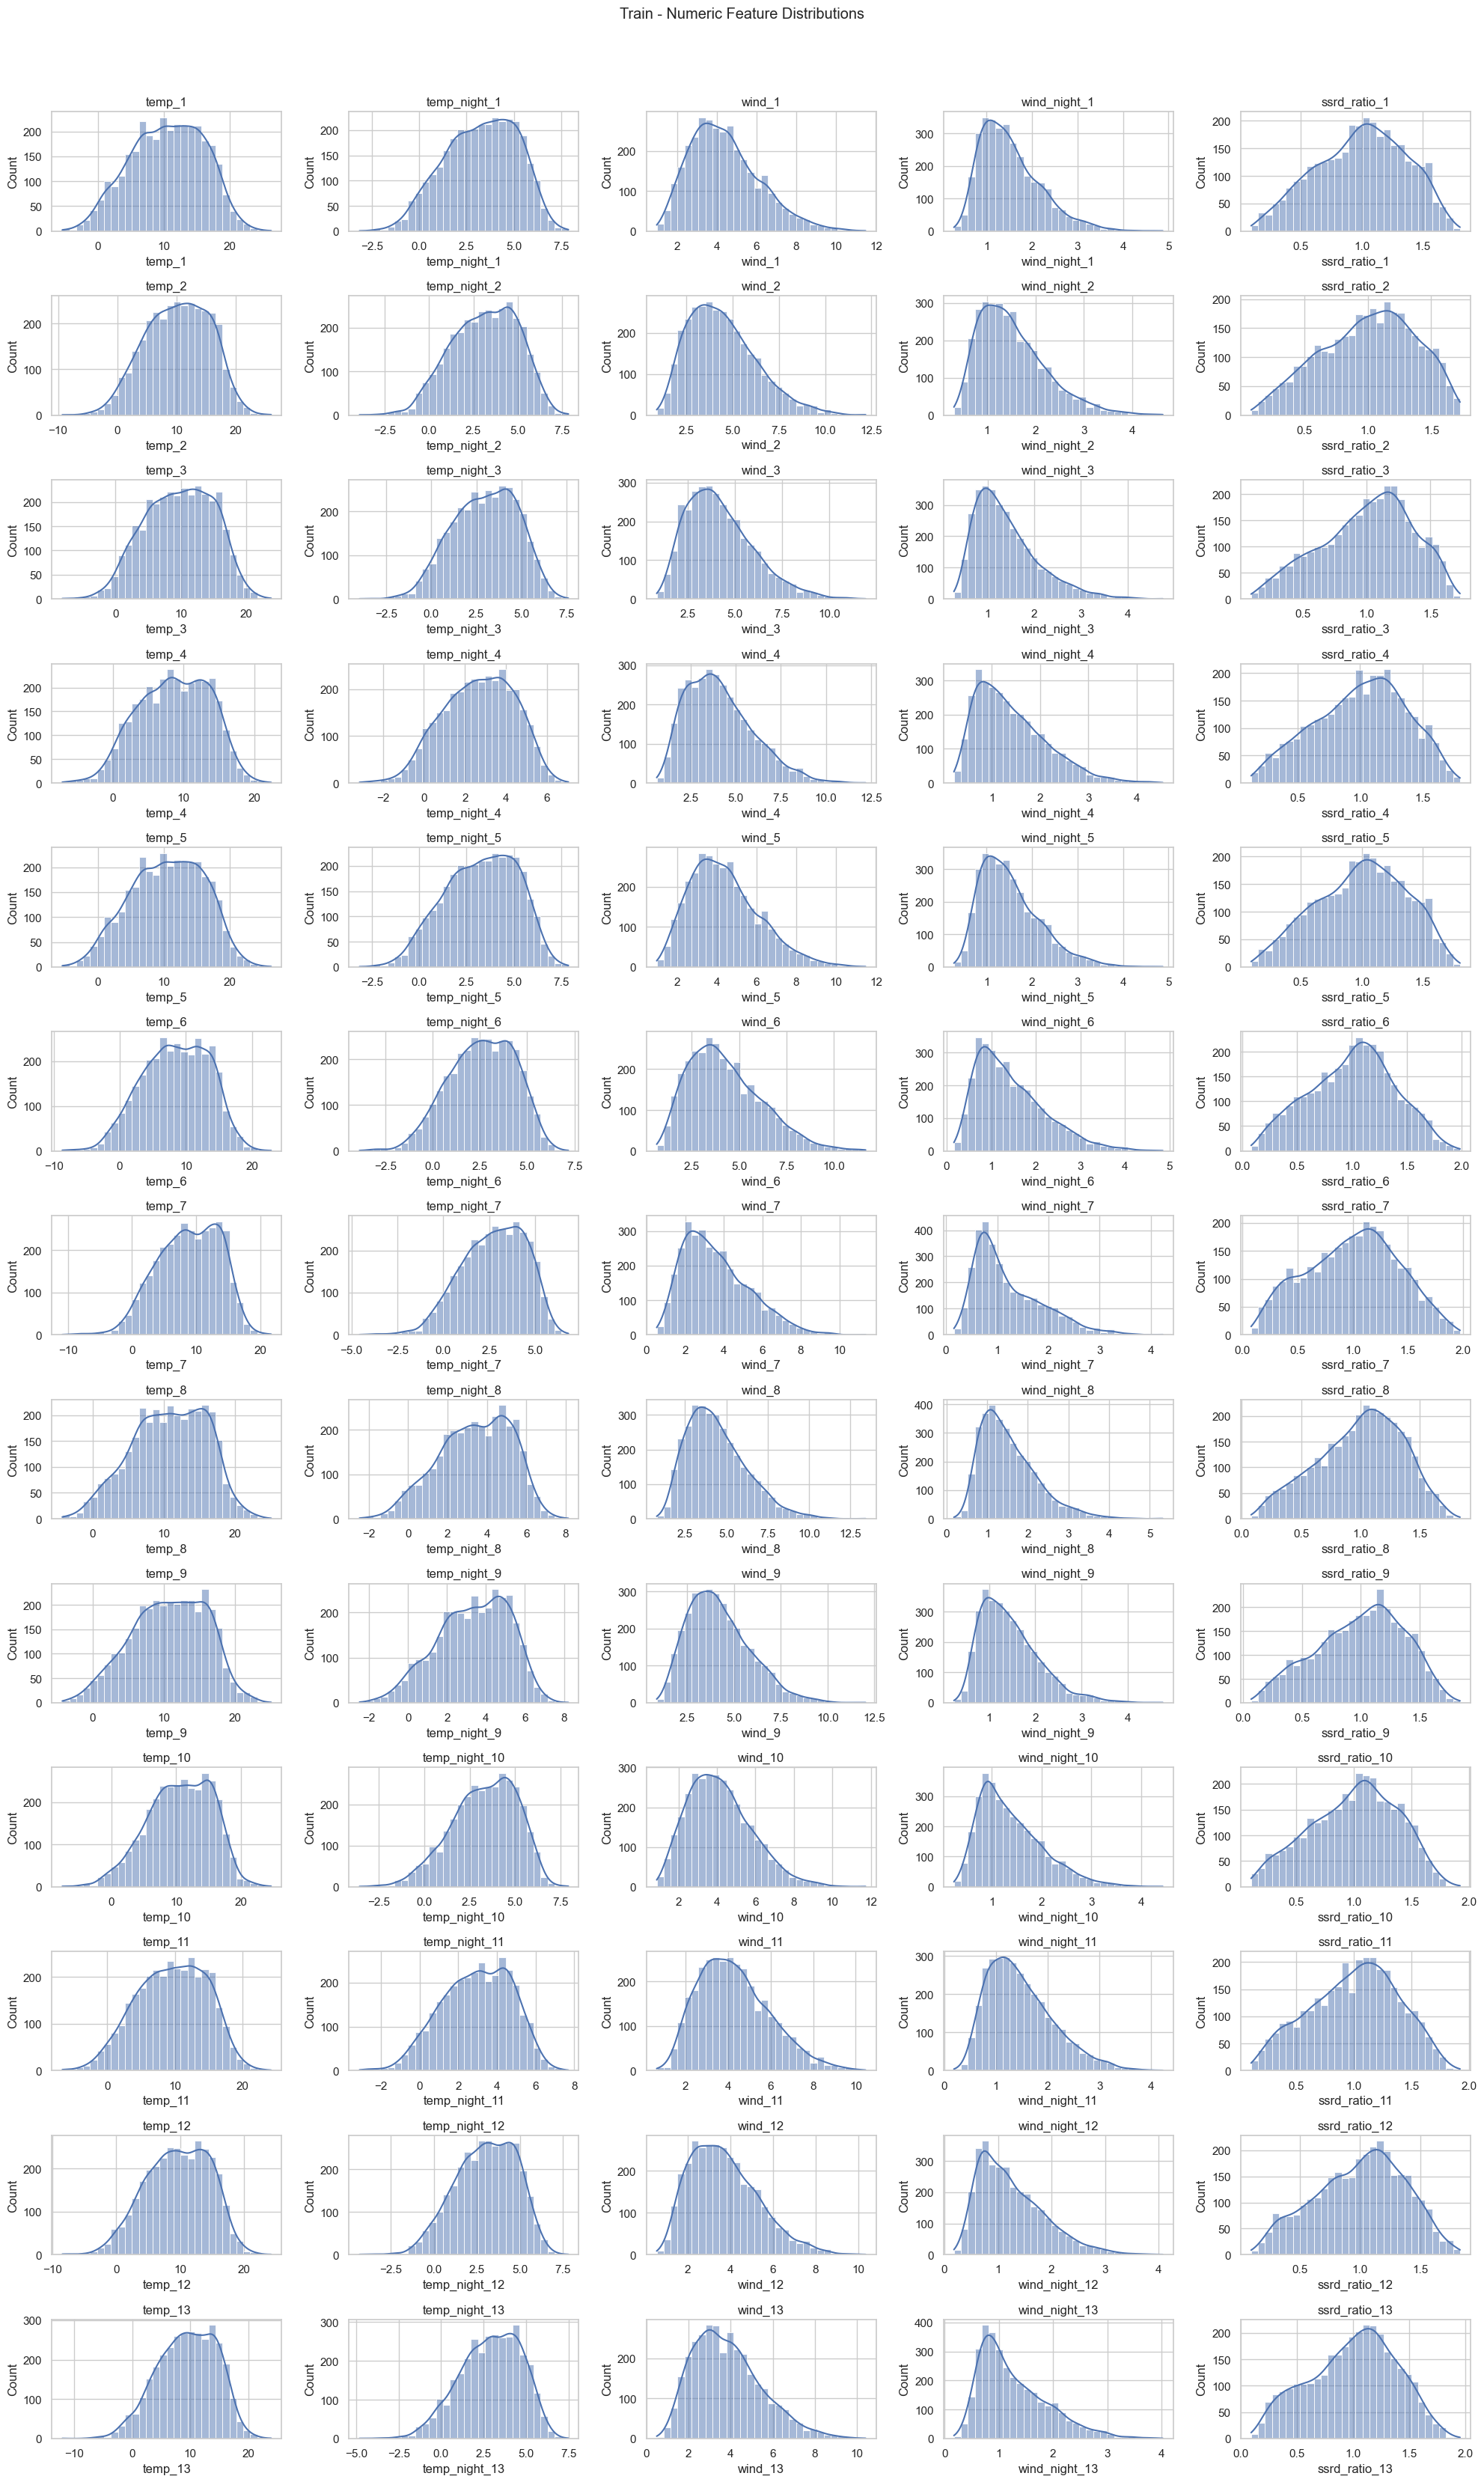

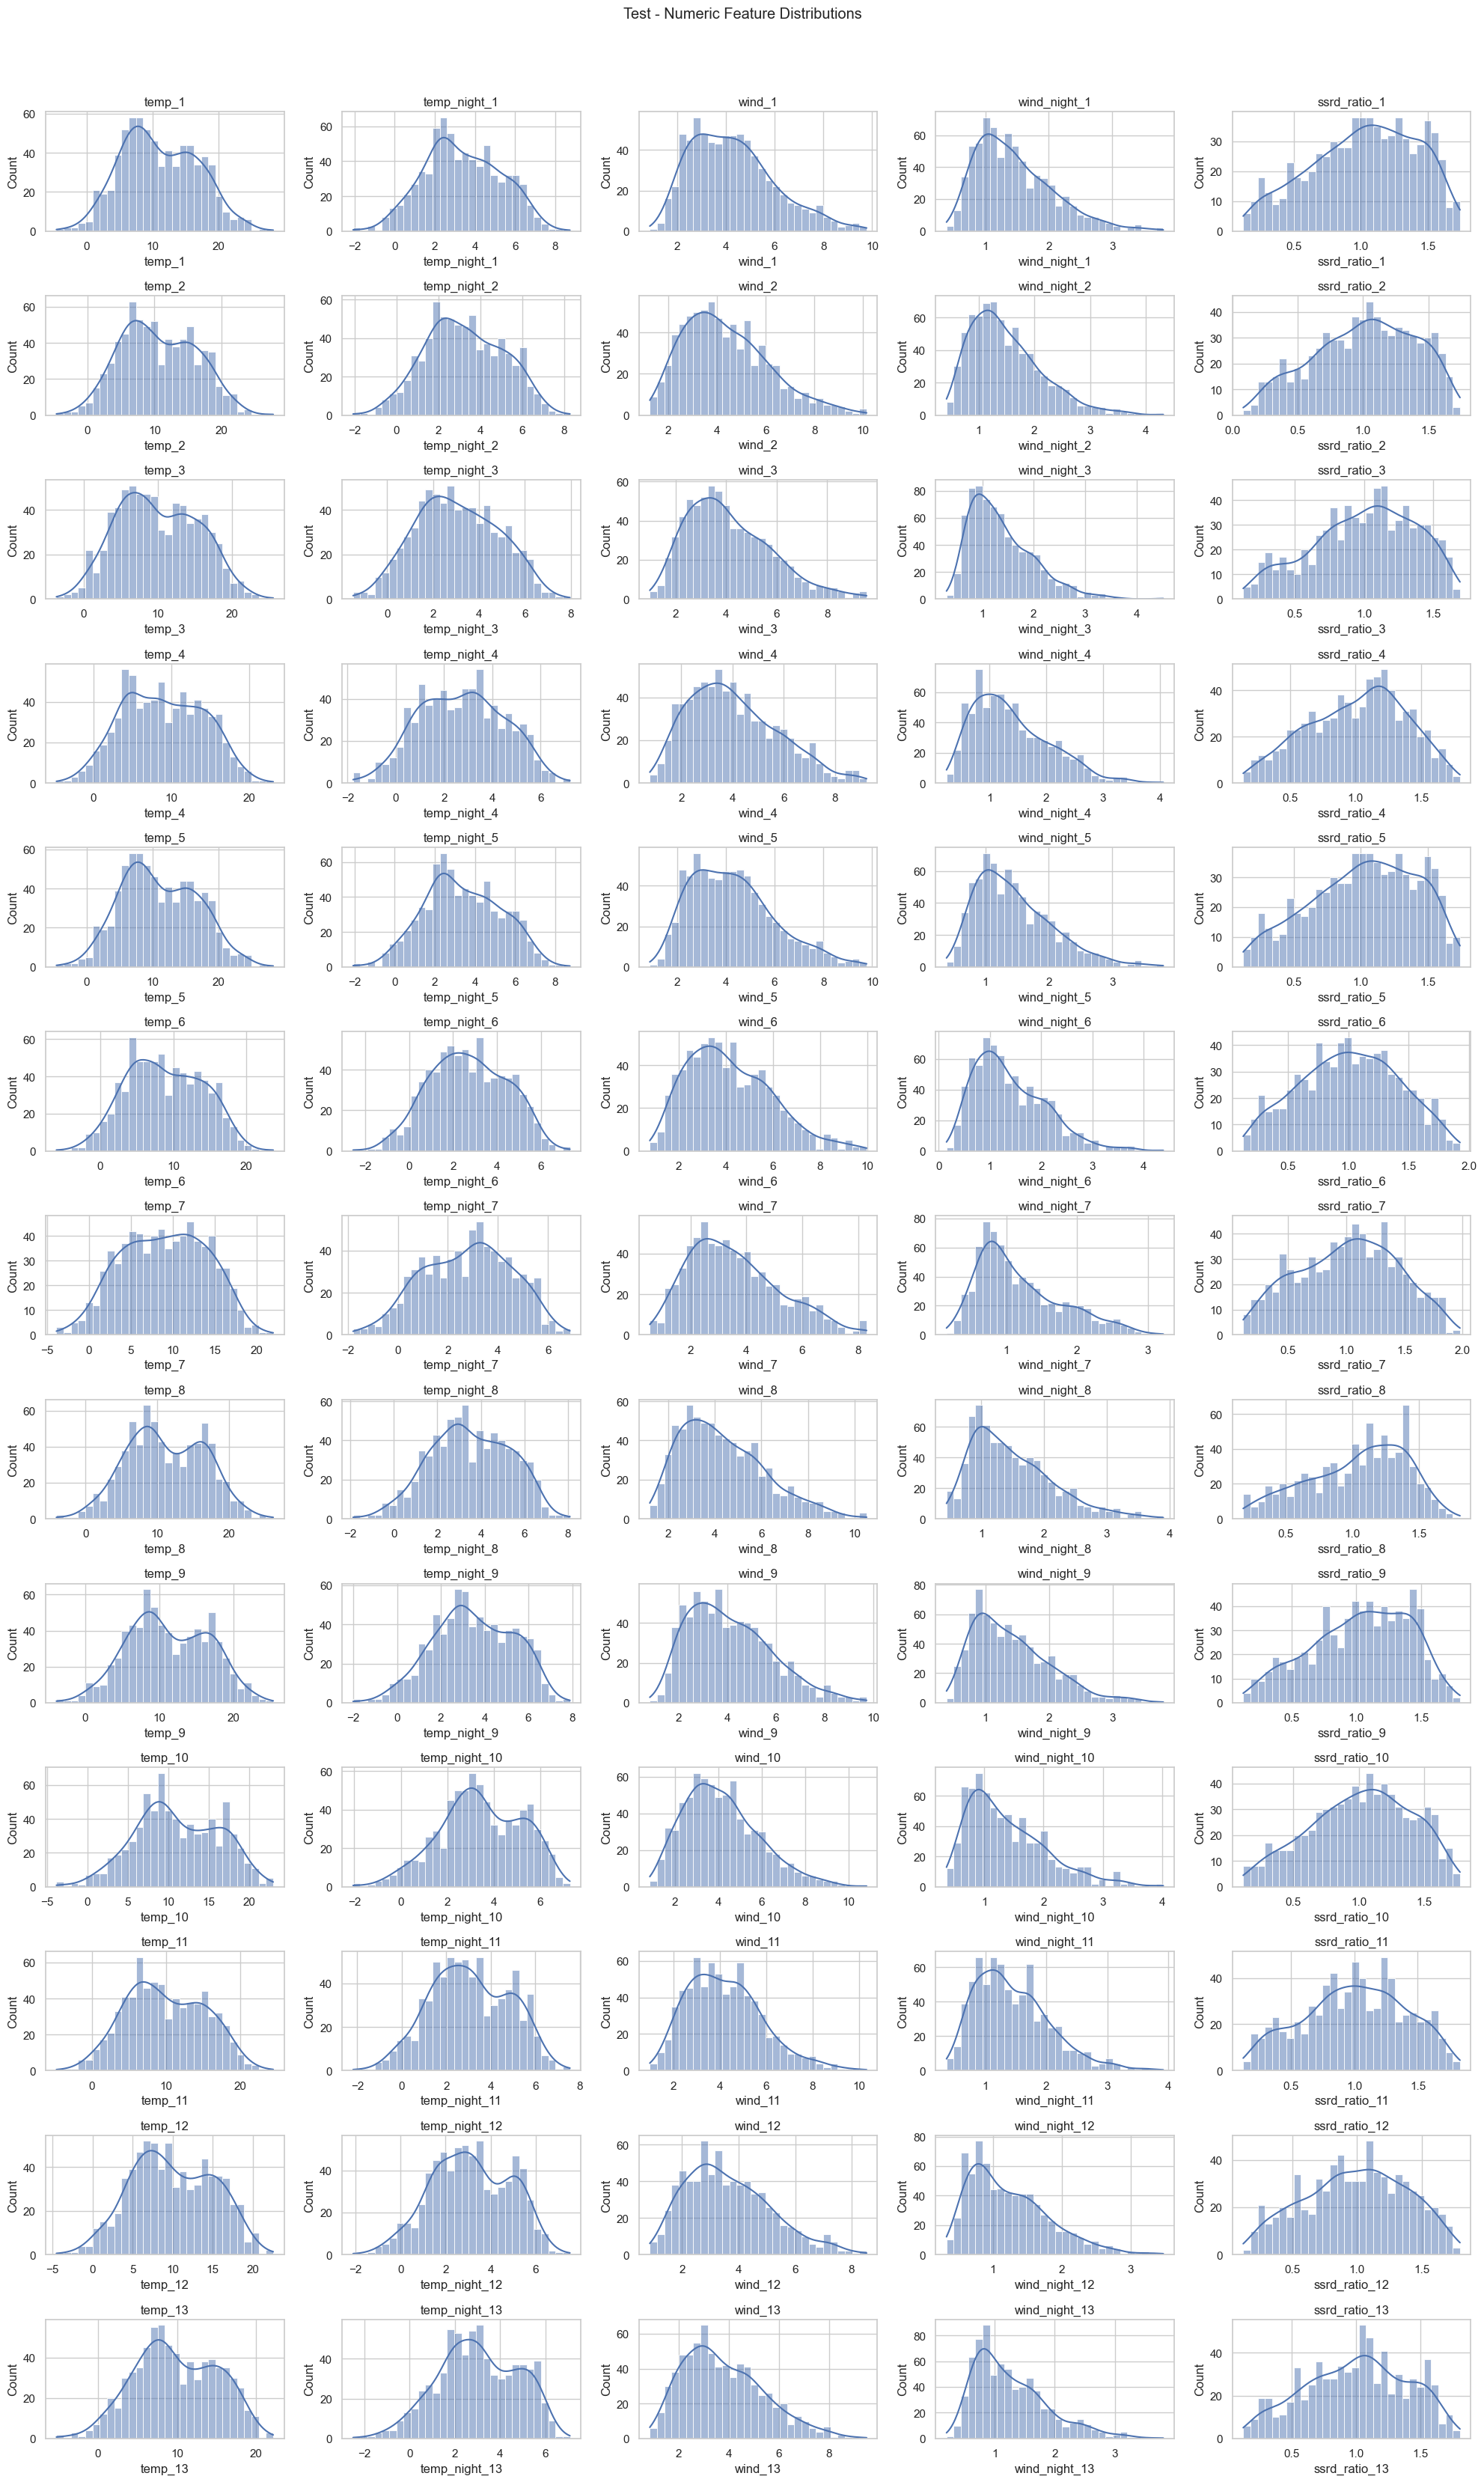

In [36]:
# Numeric feature distributions
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if (c != TARGET) and (c != "id")]
print('Numeric features (excluding target and id):', num_cols)

def facet_hist(df, cols: List[str], bins=30, height=2.5, cols_per_row=5, title_prefix=''):
    if not cols:
        return
    n = len(cols)
    rows = math.ceil(n / cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(4*cols_per_row, height*rows))
    axes = np.array(axes).reshape(rows, cols_per_row)
    for i, c in enumerate(cols):
        r, k = divmod(i, cols_per_row)
        ax = axes[r, k]
        sns.histplot(df[c].dropna(), bins=bins, kde=True, ax=ax)
        ax.set_title(c)
    # hide empty axes
    for j in range(n, rows*cols_per_row):
        r, k = divmod(j, cols_per_row)
        axes[r, k].axis('off')
    plt.suptitle(title_prefix + ' Numeric Feature Distributions', y=1.02)
    plt.tight_layout()
    plt.show()

facet_hist(train, num_cols, title_prefix='Train -')
facet_hist(test, num_cols, title_prefix='Test -')

# Correlation between data

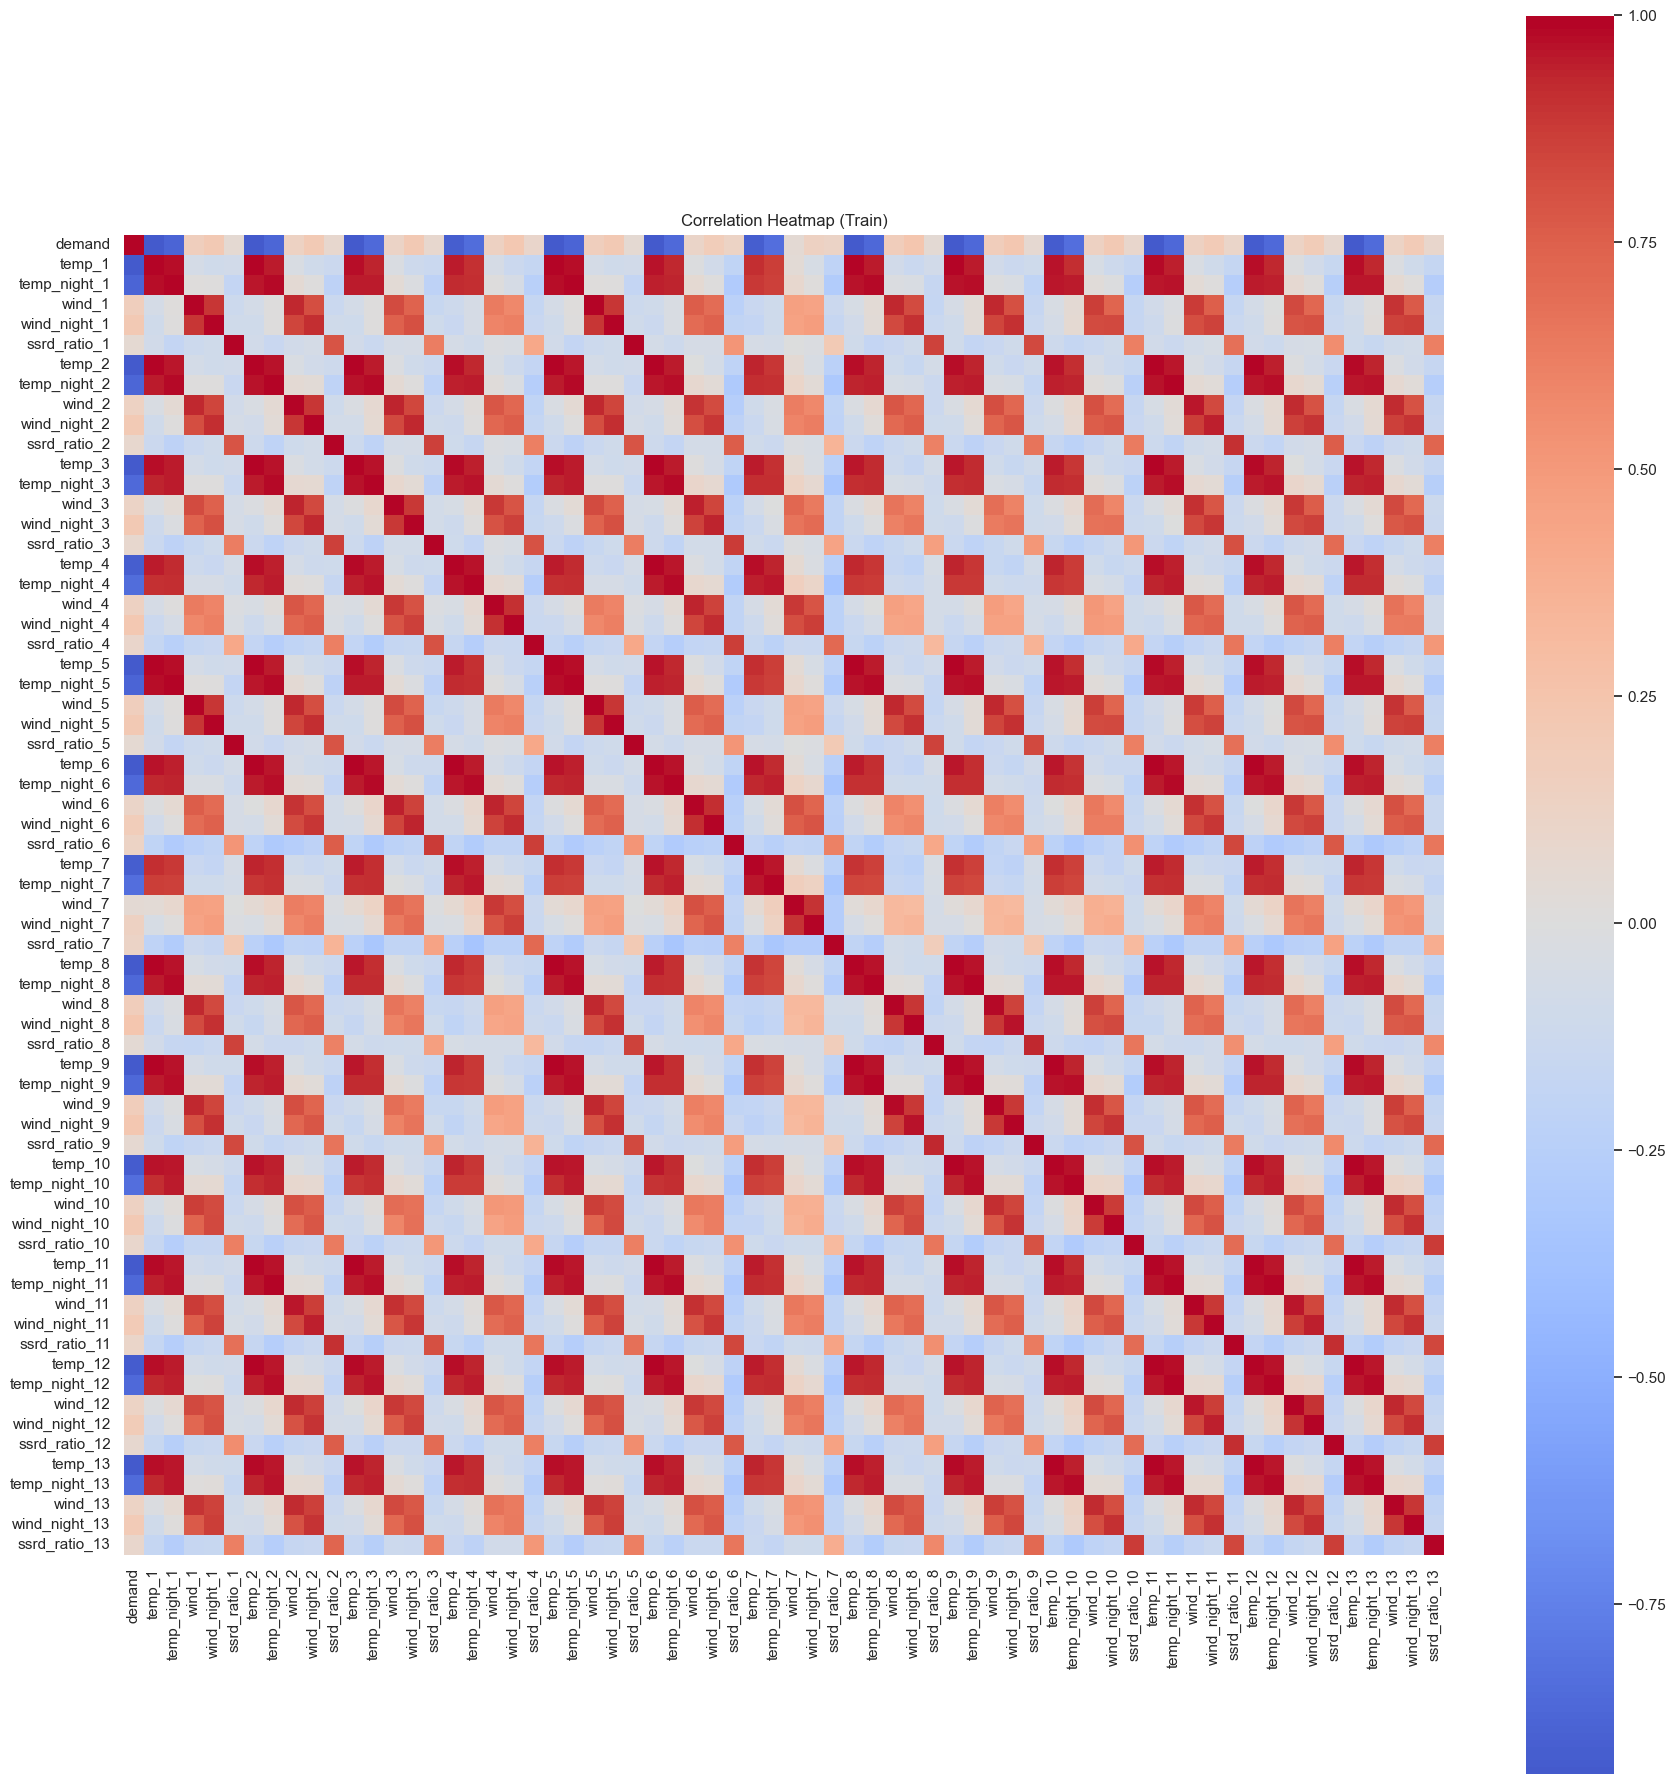

In [37]:
# Correlation heatmap (train)
corr_cols = train.select_dtypes(include=[np.number]).columns.tolist()
corr_cols = [c for c in corr_cols if c!="id"]

plt.figure(figsize=(min(1+0.5*len(corr_cols), 18), min(1+0.5*len(corr_cols), 18)))
corr = train[corr_cols].corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, square=True)
plt.title('Correlation Heatmap (Train)')
plt.tight_layout()
plt.show()

# Compare train and test features distribution

Shared numeric features: {'wind_night_1', 'wind_10', 'temp_1', 'temp_night_1', 'wind_night_4', 'temp_11', 'wind_11', 'ssrd_ratio_7', 'temp_night_12', 'ssrd_ratio_11', 'temp_4', 'wind_4', 'temp_night_5', 'wind_9', 'wind_6', 'temp_12', 'temp_night_7', 'temp_7', 'temp_8', 'temp_10', 'temp_night_4', 'wind_night_8', 'wind_3', 'wind_13', 'ssrd_ratio_4', 'temp_night_3', 'wind_5', 'ssrd_ratio_5', 'ssrd_ratio_13', 'temp_2', 'temp_night_8', 'id', 'wind_night_3', 'temp_6', 'wind_night_11', 'wind_1', 'ssrd_ratio_10', 'temp_night_10', 'temp_5', 'wind_night_7', 'wind_night_13', 'ssrd_ratio_12', 'temp_13', 'ssrd_ratio_8', 'wind_7', 'wind_night_6', 'temp_night_13', 'ssrd_ratio_1', 'wind_night_12', 'temp_9', 'wind_2', 'wind_night_10', 'ssrd_ratio_6', 'wind_night_2', 'wind_night_5', 'ssrd_ratio_3', 'temp_night_2', 'ssrd_ratio_9', 'ssrd_ratio_2', 'wind_8', 'wind_12', 'temp_night_9', 'temp_3', 'temp_night_6', 'temp_night_11', 'wind_night_9'}


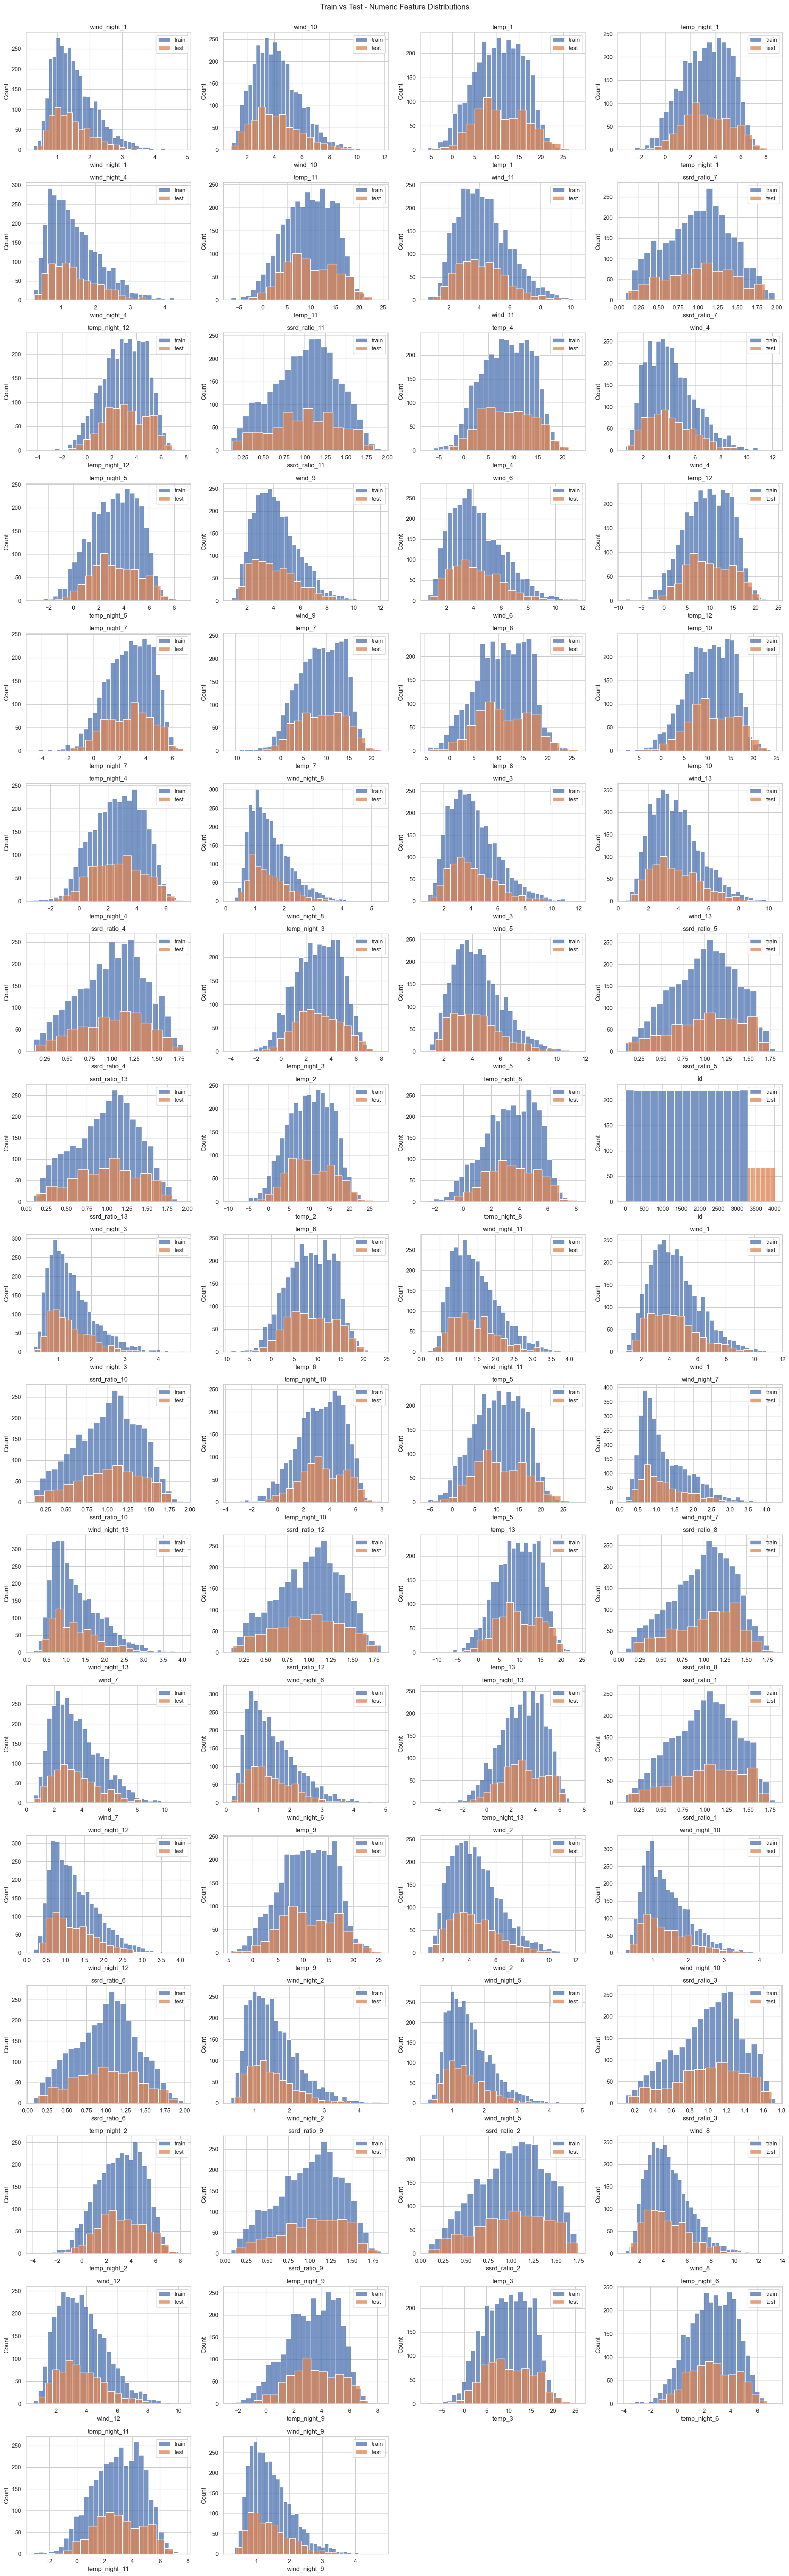

In [41]:
# Train vs Test distribution comparison for shared numeric features
shared_num = set(train.select_dtypes(include=[np.number]).columns) & set(test.select_dtypes(include=[np.number]).columns)
print('Shared numeric features:', shared_num)

n = len(shared_num)
rows = math.ceil(n / 4)
fig, axes = plt.subplots(rows, 4, figsize=(21, 4*rows))
axes = np.atleast_2d(axes)
for i, col in enumerate(shared_num):
    r, c = divmod(i, 4)
    ax = axes[r, c]
    sns.histplot(train[col].dropna(), label='train', ax=ax)
    sns.histplot(test[col].dropna(), label='test', ax=ax)
    ax.set_title(col)
    ax.legend()
for j in range(n, rows*4):
    r, c = divmod(j, 4)
    axes[r, c].axis('off')
plt.suptitle('Train vs Test - Numeric Feature Distributions', y=1)
plt.tight_layout()
plt.show()


# Time series plots

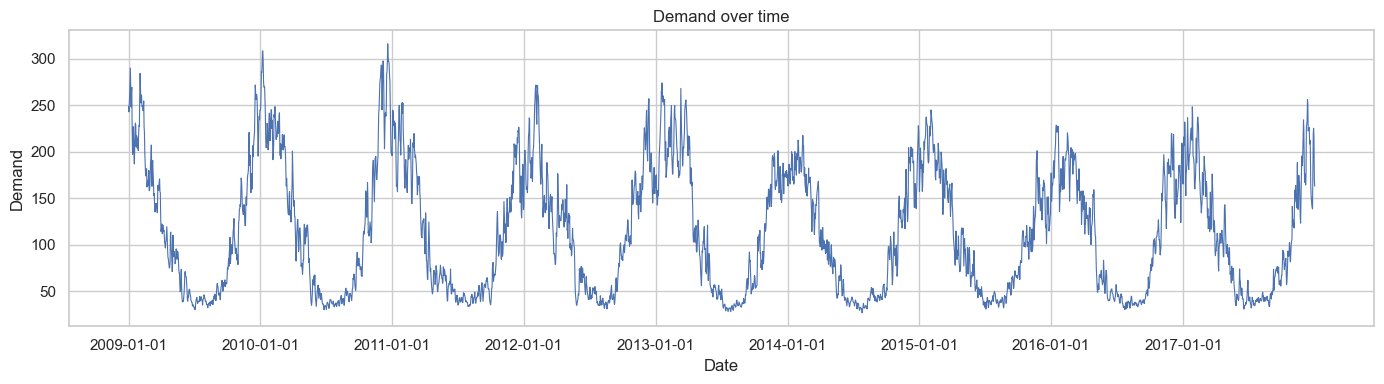

In [44]:
# Time series plot of demand if datetime column was found
ts = train[["date", TARGET]].dropna().sort_values("date")
plt.figure(figsize=(14,4))
plt.plot(ts["date"], ts[TARGET], lw=0.8)
plt.title('Demand over time')
plt.xlabel('Date')
plt.ylabel('Demand')
# Set xticks to show only one date per year
years = pd.to_datetime(ts["date"]).dt.year.unique()
xticks = [ts[ts["date"].str.startswith(str(y))].iloc[0]["date"] for y in years]
plt.xticks(xticks, xticks)
plt.tight_layout()
plt.show()

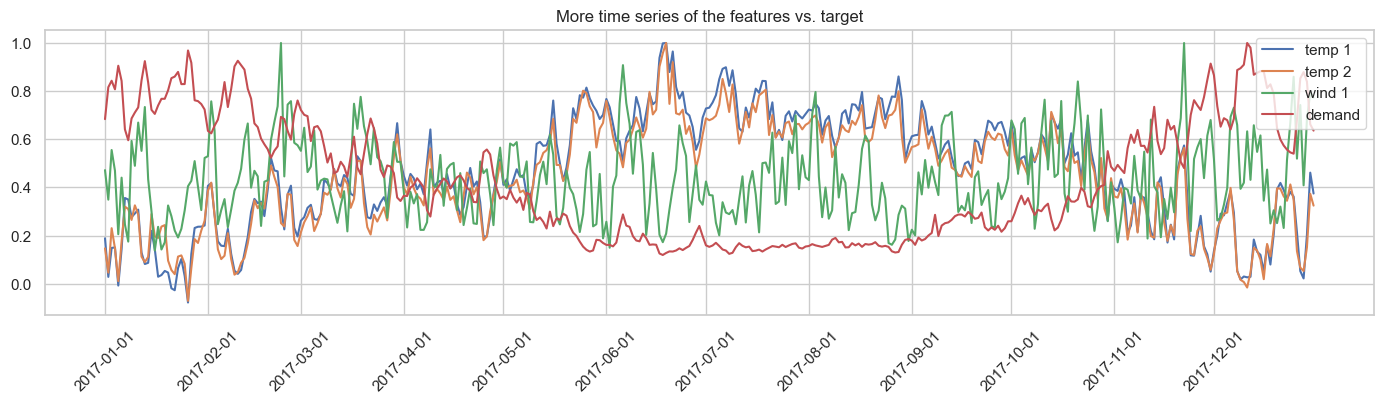

In [ ]:
# Zoom in the last 1 year
ts = train[pd.to_datetime(train["date"]) > (pd.to_datetime(train["date"]).max() - pd.DateOffset(years=1))]

fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(111)
ax.plot(ts["date"], ts["temp_1"]/ts["temp_1"].max(), label="temp 1")
ax.plot(ts["date"], ts["temp_2"]/ts["temp_2"].max(), label="temp 2")
ax.plot(ts["date"], ts["wind_1"]/ts["wind_1"].max(), label="wind 1")
ax.plot(ts["date"], ts["demand"]/ts["demand"].max(), label="demand")
ax.legend()

# Set xticks to show only one date per month
ts_dates = pd.to_datetime(ts["date"])
unique_months = ts_dates.dt.to_period('M').unique()
xticks = []
for m in unique_months:
	first_date = ts_dates[ts_dates.dt.to_period('M') == m].iloc[0].strftime('%Y-%m-%d')
	xticks.append(first_date)
plt.xticks(xticks, xticks, rotation=45)
plt.tight_layout()
plt.title("1 year of more time series of the features vs. target")
plt.show()

## Next steps

- Engineer additional features (e.g., lags/rolling stats of demand and weather, holidays, temperature transformations like HDD/CDD)
- Handle missing values and outliers
- Split validation folds by time (to respect temporal ordering)
- Train baseline models (Linear/Elastic Net, Tree-based methods, Gradient Boosting, XGBoost/LightGBM)
- Perform hyperparameter tuning and evaluate using appropriate metrics (e.g., RMSE/MAE)
- Build a final training pipeline and generate predictions for `test.csv`